In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

#### Mean, Median, Mode

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [6]:
np.median(df['total_bill'])

np.float64(17.795)

In [7]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

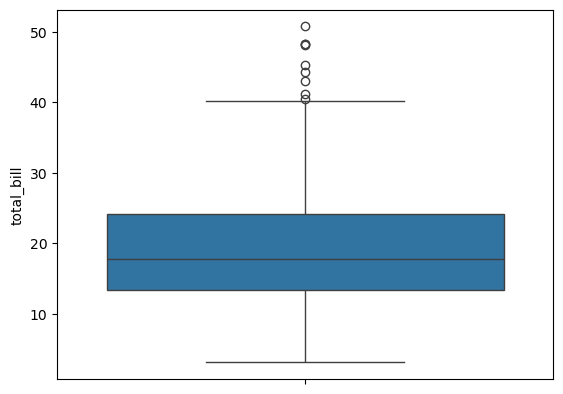

In [8]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

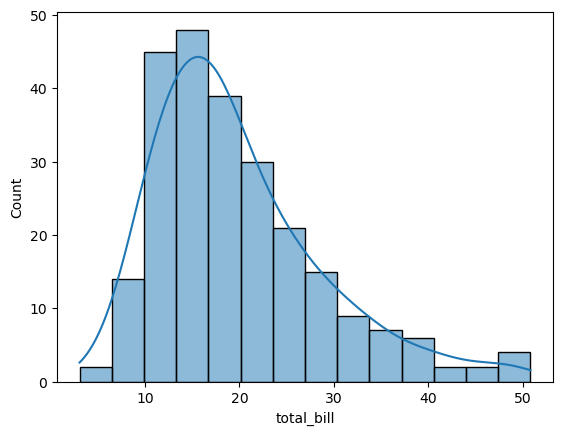

In [9]:
sns.histplot(df['total_bill'], kde = True)

In [10]:
df1 = sns.load_dataset('iris')

In [11]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

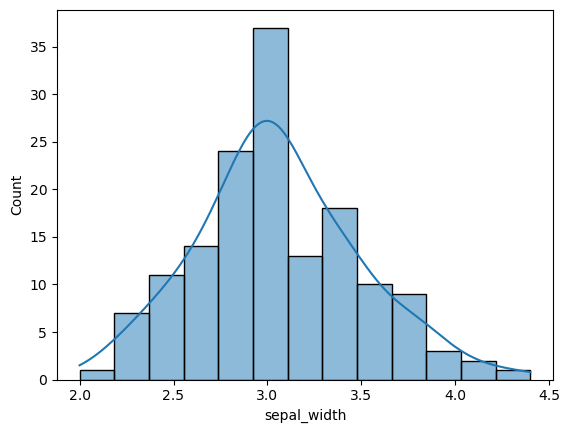

In [12]:
sns.histplot(df1['sepal_width'], kde = True)

<Axes: xlabel='count', ylabel='species'>

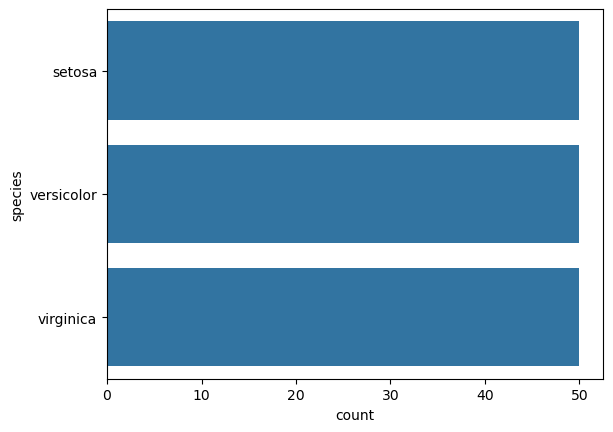

In [13]:
sns.countplot(df1['species'])

In [14]:
np.percentile(df1['sepal_length'], [25, 75, 99])

array([5.1, 6.4, 7.7])

# Outliers

In [15]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,
           12,14,12,108,12,11,14,13,15,12,10,15,12,10,14,13,15,10]

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

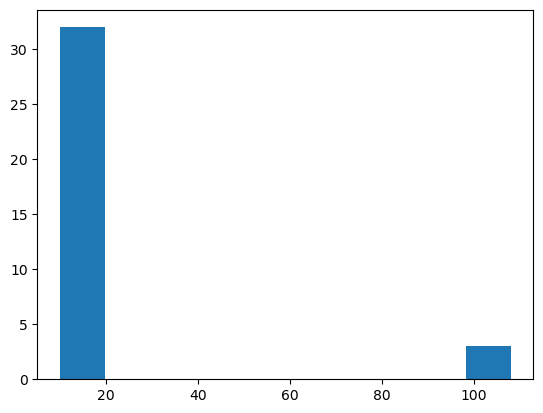

In [16]:
plt.hist(dataset)

# Z score

In [17]:
outliers = []

def detect_outliers(data):
    threshold = 3     ## 3rd std deviation
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:  ## np.abs is absolute
            outliers.append(i)           ## means roundoff
            
    return outliers      
    

In [18]:
detect_outliers(dataset)

[102, 107, 108]

# IQR  

In [19]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [20]:
q1,q3 = np.percentile(dataset, [ 25, 75])
q1,q3

(np.float64(12.0), np.float64(15.0))

In [21]:
iqr = q3 - q1
iqr

np.float64(3.0)

In [22]:
lower_fence = q1 - (1.5* iqr)
higher_fence = q3 + (1.5* iqr)
lower_fence, higher_fence

(np.float64(7.5), np.float64(19.5))

<Axes: >

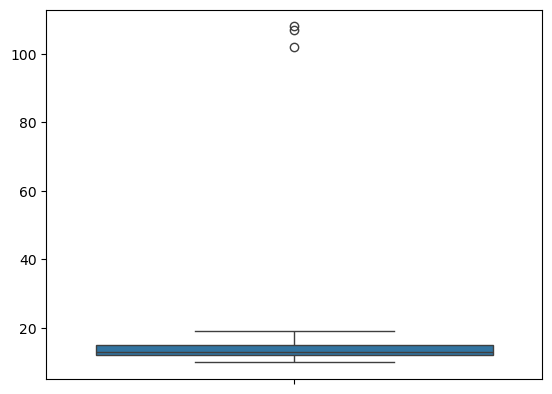

In [23]:
sns.boxplot(dataset)

# Z test

In [24]:
from statsmodels.stats.weightstats import ztest as ztest

In [25]:
## enter IQ levels for 20 patients

data = [88,92,94,94,96,97,97,97,99,99,105,109,109,109,110,112,112,
        113,114,115]

In [26]:
ztest(data, value = 100)

(np.float64(1.5976240527147705), np.float64(0.11012667014384257))

In [27]:
## t - test

ages = [ 10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,
         17,32,35,26,27,65,18,43,23,21,20,19,70] 

In [28]:
ages_mean = np.mean(ages)
ages_mean

np.float64(30.34375)

In [29]:
sample_size = 10
age_sample = np.random.choice(ages,sample_size)

In [30]:
age_sample

array([32, 28, 10, 50, 35, 14, 55, 18, 18, 40])

In [31]:
np.mean(age_sample)

np.float64(30.0)

In [32]:
from scipy.stats import ttest_1samp

In [33]:
ttest_1samp(age_sample, 30)

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.int64(9))

In [34]:
## consider another example
## ages of the college student (population)
## 1 class student mean of all the ages

In [35]:
import scipy.stats as stats
import math

np.random.seed(6)
school_ages = stats.poisson.rvs(loc = 18, mu = 35, size = 1500)
classA_ages = stats.poisson.rvs(loc = 18, mu = 30, size = 60)

In [36]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], shape=(1500,))

In [37]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [38]:
classA_ages.mean()

np.float64(46.9)

In [39]:
_, p_value = ttest_1samp(classA_ages, school_ages.mean())

In [40]:
school_ages.mean()

np.float64(53.303333333333335)

In [41]:
if p_value <= 0.05:
    print("Reject H0")
else:
    print("Accept H0")

Reject H0


In [42]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


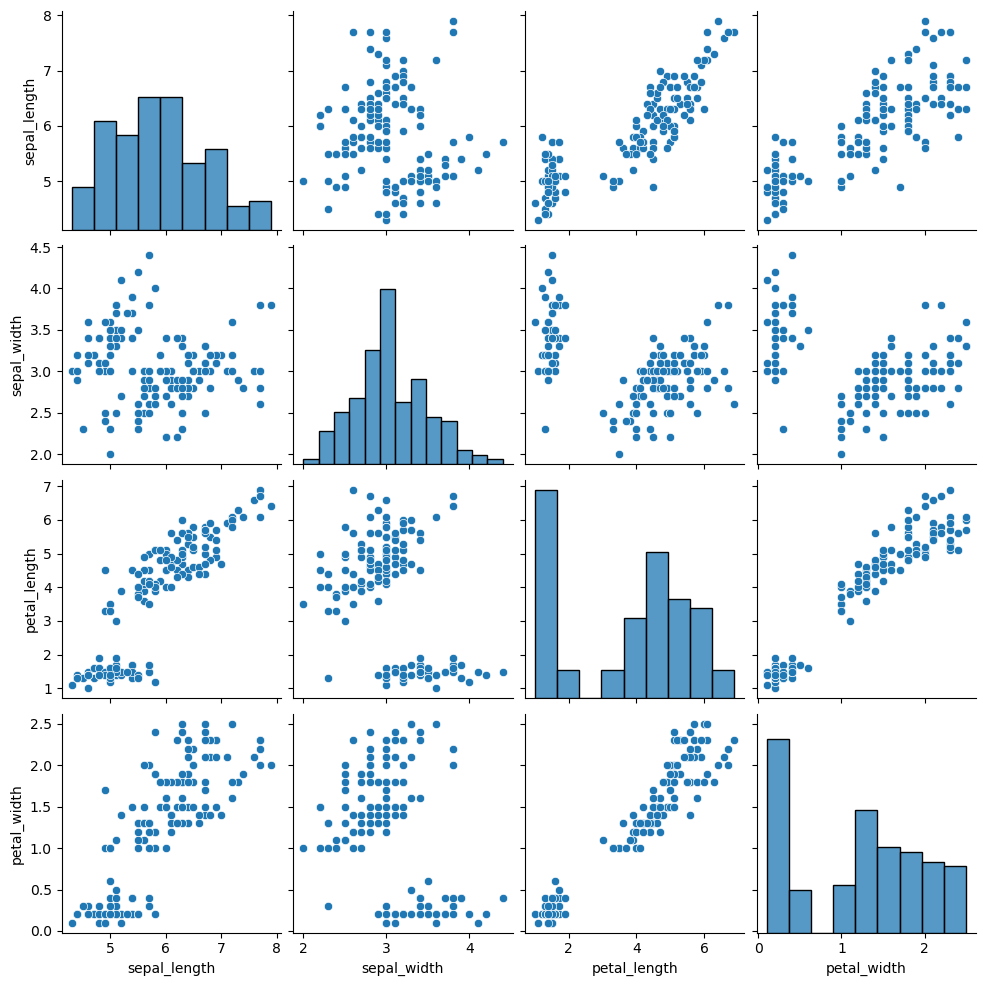

In [44]:
sns.pairplot(df)